#**RFM Aanalysis & Sales Forecasting Brazilian E-commerce by Gaia Inc.**
**Final Project Job Connector Data Science Batch 7 - Purwadhika**
***

*Member:*
- Muhammad Nurrizka Ramadhan
- Muhammad Faizal Akbar
- Shofli Yazid Khoirul Roziqin

##**Content**

1. Business Problem Understanding

2. Data Understanding & Preprocessing

3. EDA

4. RFM Analyisis

5. Modelling 

6. Conclusion

7. Recommendation

*NB: Nanti cek dulu aspek yang harus dimasukkan ke final project sesuai guideline final project*

***

##**Business Problem Understanding**

**Context** <br>
Sejak kemunculan internet ditahun 1990-an membuat dunia berevolusi sangat cepat. Internet telah merubah segala bidang mulai dari ekonomi, pendidikan, sampai dengan budaya yang ada di dunia saat ini. Salah satu perubahan yang paling signifikan sejak lahirnya era internet adalah terjadinya revolusi dalam berbisnis seperti munculnya e-commerce. E-commerce merupakan salah satu revolusi dalam dunia saat ini yang disebabkan oleh internet, e-commerce sendiri sangat memudahkan manusia dimana kita sebagai manusia dapat membeli segala jenis barang yang kita inginkan dan barang tersebut akan diantarkan tepat didepan rumah kita. Saat ini banyak sekali e-commerce yang bertebaran didunia mulai dari yang memiliki pangsa pasar global seperti Amazon dan Alibaba, atau juga e-commerce yang memiliki pangsa pasar khusus di suatu negara seperti Tokopedia yang ada di Indonesia dan juga Olist yang salah satunya berada di Brazil. Saat ini GAIA.INC sebagai salah satu perusahaan konsultan telah berhasil memenangkan tender untuk membantu Olist untuk meramal performance perusahaan untuk periode selanjutnya untuk dapat menentukan langkah-langkah tepat yang dapat diambil.

**Problem Statement** <br>
Berdasarkan tender yang berhasil didapatkan sebelumnya, Olist memberikan penjelasan bahwa mereka memiliki dataset penjualan dari tahun 2016 - 2018 yang berada di Brazil. Dataset tersebut memiliki sekitar 100.000 data informasi terkait pemesanan yang dilakukan oleh customer. Pihak Olist juga mengatakan bahwa mereka memiliki banyak data namun bingung bagaimana untuk meramal performance penjualan untuk memutuskan langkah apa yang dapat dibuat untuk dapat tetap meningkatkan keuntungan. 

Dari beberapa penjelasan tersebut, GAIA.INC sebagai konsultan yang ditunjuk oleh Olist memberikan rekomendasi untuk membuat analisis forecasting ditambah dengan RFM analysis dari data yang ada untuk dapat memprediksi sales. 

**Goals** <br>
Penjelasan di bagian **Context** & **Problem Statement** dapat disimpulkan bahwa analisa Forecasting Timeseries merupakan metode yang dapat memproyeksikan performance sales, maka dari itu Olist membutuhkan kemampuan prediksi untuk dapat melihat trend penjualan berdasarkan performance tanggal-tanggal sebelumnya. Selain itu, dapat juga dilakukan analisis segmentasi customer agar perusahaan dapat memberikan treatment yang tepat terhadap jenis-jenis customer yang berbeda dari segi recency, frequency, dan moneytary.

Dengan mengetahui itu semua, Olist dapat membuat strategi yang tepat untuk meningkatkan sales dan revenue seperti penyediaan stock barang yang laku terjual pada waktu-waktu tertentu ataupun pemilihan strategi marketing dan promosi perusahaan sehingga dapat memberikan keuntungan yang lebih pada perusahaan.

**Analytic Approach** <br>
Jadi GAIA.INC akan melakukan analisis data untuk memprediksi sales yang kemungkinan terjadi dari situs e-commerce Olist. Prediksi tersebut didasarkan pada performa sales selama 2 tahun terakhir yaitu tahun 2016-2018.
Selain itu juga akan dilakukan analisis RFM untuk membagi customer menjadi beberapa segmen berdasarkan recency, frequency, dan moneytary.

**Metric Evaluation** <br>
RMSE

##**Data Understanding & Preprocessing**

In [ ]:
# library

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%cd /content/drive/My Drive/Final Project Bootcamp Purwadhika/Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Final Project Bootcamp Purwadhika/Dataset


In [ ]:
cus=pd.read_csv("olist_customers_dataset.csv")
geo=pd.read_csv("olist_geolocation_dataset.csv")
itm=pd.read_csv("olist_order_items_dataset.csv")
pay=pd.read_csv("olist_order_payments_dataset.csv")
rev=pd.read_csv("olist_order_reviews_dataset.csv")
ord=pd.read_csv("olist_orders_dataset.csv")
prd=pd.read_csv("olist_products_dataset.csv")
sel=pd.read_csv("olist_sellers_dataset.csv")
cat=pd.read_csv("product_category_name_translation.csv")

In [ ]:
df=pd.read_csv("Olist Dataset Final.csv")

## **EDA (Explanatory Data Analysis)**

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [ ]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,...,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou e...,2018-04-18 00:00:00,2018-04-20 05:01:01
1,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,...,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou e...,2018-04-18 00:00:00,2018-04-20 05:01:01
2,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,...,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31 00:00:00,2018-08-31 22:49:14
3,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,...,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25 00:00:00,2018-08-25 23:44:42
4,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,...,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19 00:00:00,2018-05-20 18:56:33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116604 entries, 0 to 116603
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116604 non-null  object 
 1   order_item_id                  116604 non-null  int64  
 2   product_id                     116604 non-null  object 
 3   seller_id                      116604 non-null  object 
 4   shipping_limit_date            116604 non-null  object 
 5   price                          116604 non-null  float64
 6   freight_value                  116604 non-null  float64
 7   product_category_name          116604 non-null  object 
 8   product_category_name_english  116604 non-null  object 
 9   product_name_lenght            116604 non-null  float64
 10  product_description_lenght     116604 non-null  float64
 11  product_photos_qty             116604 non-null  float64
 12  product_weight_g              

In [ ]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,...,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou e...,2018-04-18 00:00:00,2018-04-20 05:01:01
1,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,cama_mesa_banho,bed_bath_table,52.0,...,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,(no comment title),Minha mercadoria não chegou e ninguém entrou e...,2018-04-18 00:00:00,2018-04-20 05:01:01
2,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,utilidades_domesticas,housewares,58.0,...,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,(no comment title),(no comment message),2018-08-31 00:00:00,2018-08-31 22:49:14
3,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,informatica_acessorios,computers_accessories,59.0,...,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25 00:00:00,2018-08-25 23:44:42
4,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,automotivo,auto,52.0,...,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19 00:00:00,2018-05-20 18:56:33


In [ ]:
df_ordercount = df[['order_purchase_timestamp']]
df_ordercount.head()

,order_purchase_timestamp
0,2018-03-21 13:05:30
1,2018-03-21 13:05:30
2,2018-08-15 14:29:08
3,2018-08-17 16:25:04
4,2018-05-09 14:14:06


In [ ]:
df_ordercount['order_purchase_timestamp'] = pd.to_datetime(df_ordercount['order_purchase_timestamp'])

<ipython-input-122-c4c04c0cb483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordercount['order_purchase_timestamp'] = pd.to_datetime(df_ordercount['order_purchase_timestamp'])


In [ ]:
df_ordercount['order_purchase_timestamp'] = df_ordercount['order_purchase_timestamp'].dt.date
df_ordercount.head()

<ipython-input-123-bf714d408459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordercount['order_purchase_timestamp'] = df_ordercount['order_purchase_timestamp'].dt.date


,order_purchase_timestamp
0,2018-03-21
1,2018-03-21
2,2018-08-15
3,2018-08-17
4,2018-05-09


In [ ]:
df_ordercount.dtypes

order_purchase_timestamp    object
dtype: object

In [ ]:
df_ordercount = df_ordercount['order_purchase_timestamp'].value_counts(sort = False).sort_index().rename_axis('order_purchase_timestamp').to_frame('order_counts')
df_ordercount

,order_counts
order_purchase_timestamp,
2016-09-04,2
2016-09-05,1
2016-10-02,1
2016-10-03,8
2016-10-04,76
...,...
2018-08-26,85
2018-08-27,72
2018-08-28,47


In [ ]:
df_ordercount.dtypes

order_counts    int64
dtype: object

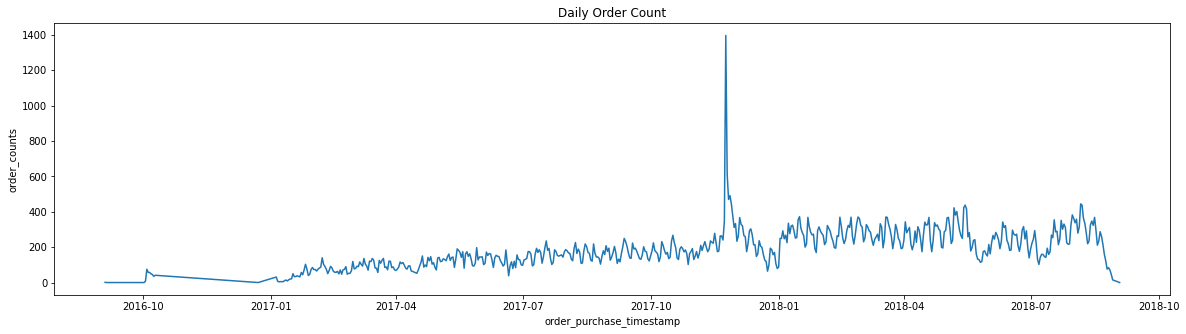

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_ordercount, x = 'order_purchase_timestamp', y = 'order_counts')
plt.title('Daily Order Count')
plt.show()

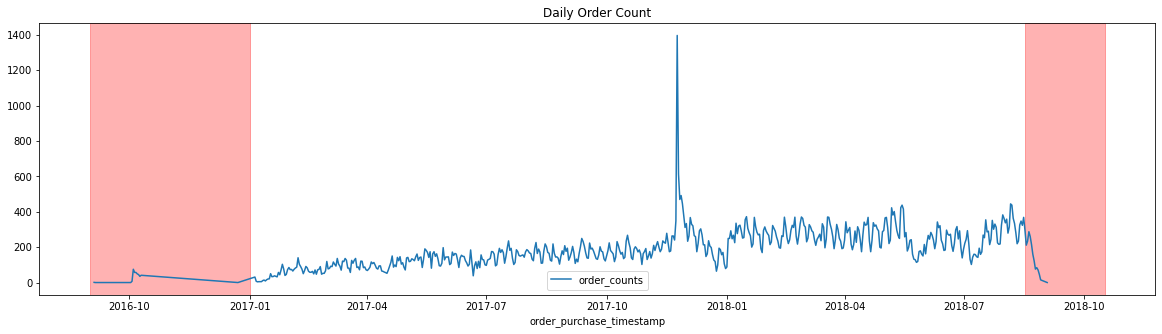

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
df_ordercount.plot(ax=ax)
ax.axvspan(datetime.date(2016, 9, 1), datetime.date(2017, 1, 1), color='red', alpha=0.3)
ax.axvspan(datetime.date(2018, 8, 17), datetime.date(2018, 10, 17), color='red', alpha=0.3)
ax.set_title('Daily Order Count')
plt.show()

## ACF PACF

In [ ]:
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

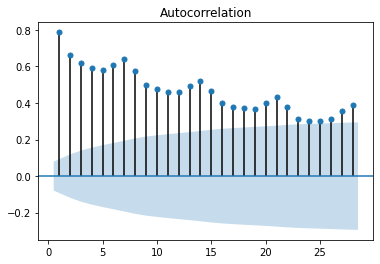

In [ ]:
plot_acf(df_ordercount['order_counts'], zero = False)
plt.show()

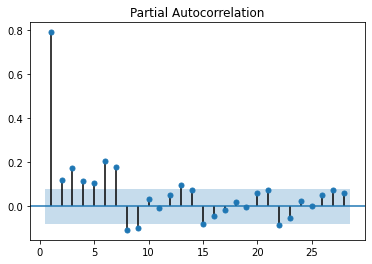

In [ ]:
plot_pacf(df_ordercount['order_counts'], zero = False)
plt.show()

### Differencing

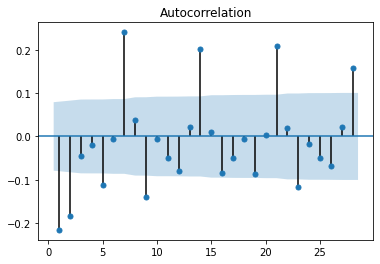

In [ ]:
plot_acf(df_ordercount['order_counts'].diff().dropna(), zero = False)
plt.show()

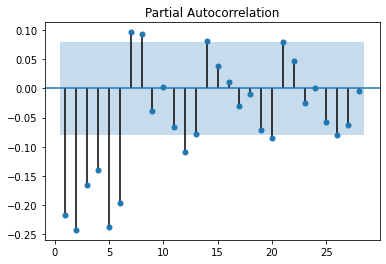

In [ ]:
plot_pacf(df_ordercount['order_counts'].diff().dropna(), zero = False)
plt.show()

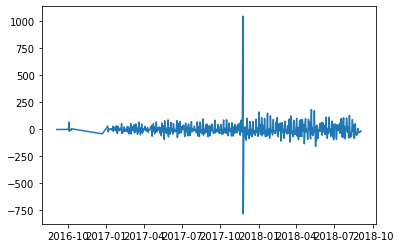

In [ ]:
plt.plot(df_ordercount['order_counts'].diff())
plt.show()

### Akan mengunakan ARIMA (2,1,0) atau (0,1,2)

## Ekstraksi Tanggal

In [ ]:
df_deliv = df[df['order_status'] == 'delivered']

In [ ]:
df_deliv.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2449,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
2450,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13 00:00:00,2017-05-15 11:34:13
2451,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
2452,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15 00:00:00,2018-08-15 16:39:01
2453,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [ ]:
df_deliv['order_purchase_timestamp'] = pd.to_datetime(df_deliv['order_purchase_timestamp'])

<ipython-input-137-80fb46820830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deliv['order_purchase_timestamp'] = pd.to_datetime(df_deliv['order_purchase_timestamp'])


In [ ]:
df_deliv['order_purchase_timestamp'] = df_deliv['order_purchase_timestamp'].dt.date
df_deliv.head()

<ipython-input-138-b4ef858cae40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deliv['order_purchase_timestamp'] = df_deliv['order_purchase_timestamp'].dt.date


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2449,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,(no comment title),"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
2450,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,(no comment title),(no comment message),2017-05-13 00:00:00,2017-05-15 11:34:13
2451,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,(no comment title),Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
2452,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,(no comment title),(no comment message),2018-08-15 00:00:00,2018-08-15 16:39:01
2453,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,(no comment title),Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [ ]:
new_df = pd.DataFrame({
    'Date' : df_deliv['order_purchase_timestamp'].unique(),
    'Count' :df_deliv['order_purchase_timestamp'].value_counts()
})
new_df.sort_values(by = 'Date', ascending = True, inplace = True)
new_df.reset_index(drop = True, inplace = True)
new_df

,Date,Count
0,2016-10-03,6
1,2016-10-04,107
2,2016-10-05,85
3,2016-10-06,72
4,2016-10-07,132
...,...,...
606,2018-08-25,319
607,2018-08-26,71
608,2018-08-27,201
609,2018-08-28,228


In [ ]:
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [ ]:
new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day'] = new_df['Date'].dt.day
new_df['weekday'] = new_df['Date'].dt.weekday

In [ ]:
new_df

,Date,Count,year,month,day,weekday
0,2016-10-03,6,2016,10,3,0
1,2016-10-04,107,2016,10,4,1
2,2016-10-05,85,2016,10,5,2
3,2016-10-06,72,2016,10,6,3
4,2016-10-07,132,2016,10,7,4
...,...,...,...,...,...,...
606,2018-08-25,319,2018,8,25,5
607,2018-08-26,71,2018,8,26,6
608,2018-08-27,201,2018,8,27,0
609,2018-08-28,228,2018,8,28,1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     611 non-null    datetime64[ns]
 1   Count    611 non-null    int64         
 2   year     611 non-null    int64         
 3   month    611 non-null    int64         
 4   day      611 non-null    int64         
 5   weekday  611 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 28.8 KB


## Skenario Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression

In [ ]:
cat_features = ['month','day','weekday']

transformer = ColumnTransformer([
                                ('one hot', OneHotEncoder(drop = 'first'),cat_features)
                                ], remainder = 'passthrough')

## Splitting Data

In [ ]:
X = new_df[['year','month','day','weekday']]
y = new_df['Count']

In [ ]:
X_train = X[new_df['Date'] < '2018-04-01']
X_test = X[new_df['Date'] >= '2018-04-01']
y_train = y[new_df['Date'] < '2018-04-01']
y_test = y[new_df['Date'] >= '2018-04-01']

In [ ]:
X_train

,year,month,day,weekday
0,2016,10,3,0
1,2016,10,4,1
2,2016,10,5,2
3,2016,10,6,3
4,2016,10,7,4
...,...,...,...,...
455,2018,3,27,1
456,2018,3,28,2
457,2018,3,29,3
458,2018,3,30,4


In [ ]:
X_test

,year,month,day,weekday
460,2018,4,1,6
461,2018,4,2,0
462,2018,4,3,1
463,2018,4,4,2
464,2018,4,5,3
...,...,...,...,...
606,2018,8,25,5
607,2018,8,26,6
608,2018,8,27,0
609,2018,8,28,1


In [ ]:
y_train

0        6
1      107
2       85
3       72
4      132
      ... 
455    323
456    215
457     72
458    192
459    325
Name: Count, Length: 460, dtype: int64

In [ ]:
y_test

460    156
461    256
462    159
463    176
464    190
      ... 
606    319
607     71
608    201
609    228
610     85
Name: Count, Length: 151, dtype: int64

## Model

In [ ]:
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_prep, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_prep)

In [ ]:
def evaluasi (y_true, y_pred):
  mse = metrics.mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print ('mse', mse)
  print ('rmse', rmse)

  plt.figure(figsize = (10,8))
  sns.scatterplot(y_pred, y_true-y_pred)

mse 14231.221458546996
rmse 119.2946832786231


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


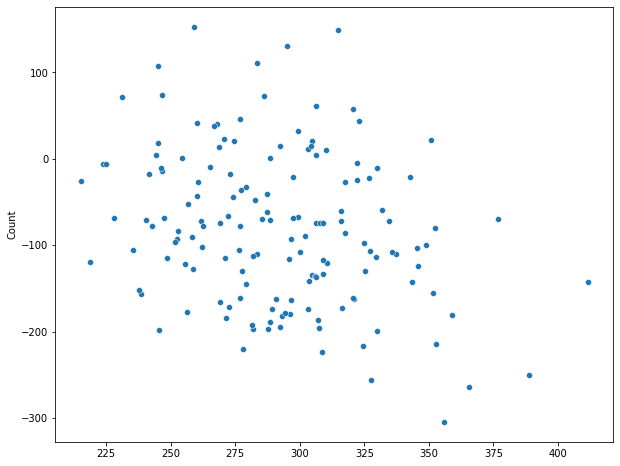

In [ ]:
evaluasi(y_test, y_pred)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
models = []
models.append(('Ridge', Ridge())) 
models.append(('Lasso', Lasso()))
models.append(('E-Net', ElasticNet()))
models.append(('SVR', SVR(gamma='auto')))
models.append(('KNN', KNeighborsRegressor())) 

# Evaluate each model in turn
results = []
names = []
for name, model in models:
  # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=5)

  cv_results = cross_val_score(model, X_train_prep, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Ridge: -136.167663 (30.360398)
Lasso: -126.652796 (27.510384)
E-Net: -117.284867 (26.023480)
SVR: -125.699674 (23.837832)
KNN: -140.279086 (24.071761)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [ ]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'E-Net': ElasticNet(),
    'SVR': SVR(gamma='auto'),
    'KNN': KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
Ridge,110.715911,91.760939,0.678216
Lasso,89.856457,73.674899,0.521693
E-Net,87.011863,70.288783,0.412406
SVR,96.450009,76.390799,0.387504
KNN,98.277189,75.422517,0.412227


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
model = ElasticNet()
pipe_model = Pipeline([
                      #('preprocess',transformer),
                       ('model',model)
])

param_search = {
    'model__alpha':[1000,100,10,1,0.1,0.01,0.001,0.0001],                     # 8 parameter
    'model__l1_ratio':list(np.arange(0,1,0.1)),                               # 10 parameter
                                                                              # TOTAL 80 kombnasi
}

tscv = TimeSeriesSplit(n_splits=5)
gsearch = RandomizedSearchCV(
    estimator = pipe_model,
    n_iter = 20,
    n_jobs = -1,
    cv = tscv,
    param_distributions = param_search,
    verbose = 1,
    scoring = 'neg_root_mean_squared_error'
)

In [ ]:
gsearch.fit(X_train_prep, y_train)
best_score = gsearch.best_score_
best_parameter = gsearch.best_params_
best_model = gsearch.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print('best score',best_score)
print('best_parameter',best_parameter)
print('best model',best_model)


best score -116.40682185128647
best_parameter {'model__l1_ratio': 0.9, 'model__alpha': 1000}
best model Pipeline(steps=[('model', ElasticNet(alpha=1000, l1_ratio=0.9))])
